# Práctica 8

David Cruz Sánchez

<p align="justify">
En un problema de aprendizaje automático supervisado, se dispone de un conjunto de muestras y normalmente las distribuciones de probabilidad a posteriori no son conocidas y por tanto deben ser estimadas a partir del conjunto de entrenamiento. Hay que tener en cuenta que X se considera como una variable aleatoria multidimensional cuya dimensión se corresponde con el número de características del problema. En este caso para mantener el mismo error en la estimación, el número de muestras debe crecer exponencialmente con la dimensionalidad del problema. Para simplificar la estimación de las probabilidades a posteriori de la regla 8.1.1 se ha propuesto el clasificador Naive Bayes que es una simplificación del anterior basándose en la suposición de que las características son condicionalmente independientes conocida la clase.
</p>

Comenzamos importando las librerías necesarias.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB,ComplementNB
from sklearn.metrics import recall_score, precision_score, accuracy_score
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Perceptron,LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from validacion_modelo import validacion_cv

# Tarea 1: Clasificación de mensajes como spam con Naive Bayes
<p align="justify">
Haciendo uso de los dos conjuntos de datos se van a clasificar los mensajes como legítimos (ham) o spam. Para ello se hará uso de las implementaciones que hace la librería sklearn del clasificador <b>Naive Bayes</b>.
</p>

Comenzamos importando y dividiendo el conjunto de datos como es común:

In [2]:
real_df = pd.read_csv("spam_preprocesado_reales.csv", sep=",")

y_real = real_df.iloc[: , 0]
X_real = real_df.iloc[: , 1:]
trainx_real,testx_real, trainy_real, testy_real = train_test_split(X_real,y_real, train_size=0.7,random_state=0)
real_df.head()

,v1,150p,150ppm,16,18,1st,2nd,500,a100,a1000,...,yes,yesterday,yet,yo,you,your,youre,yours,yourself,yup
0,ham,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ham,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,spam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ham,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ham,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<p align="justify">Para calcular los medidores que voy a utilizar y evitar repetir código, he creado una función "accuracy_calculator" que a partir de un modelo y unos datos, lo entrena, y devuelve su accuracy_score, precision score, y recall_score en una tupla.</p>

In [3]:
def accuracy_calculator(model,trainx,trainy,testx,testy):
    model.fit(trainx,trainy)
    return accuracy_score(np.array(testy), model.predict(testx)), precision_score(np.array(testy), model.predict(testx),average="weighted"), recall_score(np.array(testy), model.predict(testx), average="weighted")

A continuación creo cada uno de los modelos bayesianos y obtengo sus medidas con la función.

 * ### Usaremos los siguientes modelos de <b>Naive Bayes</b>:

<b>GaussianNB</b>: Este modelo espera que las verosimilitudes cumplan con una campana de gauss, por lo que su fórmula es la misma que la de la normal.

<b>BernoulliNB</b>: Espera que las verosimilitudes sigan una distribución de bernoulli. Esta clase requiere que los datos sean binarios, puesto que la clase asume que los datos son valores booleanos.

<b>MultibinomialNB</b>: Este modelo espera que las probabilidades de verosimilitud sigan una distribución multinomial, que es una generalización de la distribución binomial.

<b>ComplementNB</b>: Es una adaptación del anterior modelo para datasets especialmente imbalanceados, suele dar mejores resultados que multibinomialNB.

* ### Las medidas son las siguientes:

<b>accuracy_score</b>: Comprueba si las clases predichas son las mismas que las reales y lo devuelve en un % de acierto.

<b>precision_score</b>: Muestra en un %, la capacidad del modelo de no etiquetar como + una muestra -. Su fórmula es: tp / (tp + fp) donde tp  es el número de verdaderos positivos, y fp el número de falsos positivos.

<b>recall_score</b>: Representa la abilidad del clasficador para clasificar todas las muestras positivas. Su fórmula es tp / (tp + fn) donde tp es el número de verdaderos positivos y fn el de falsos negativos.

### Comenzamos calculando los restulados con datos reales:

In [4]:
acc_prec_recall_real = {}

gauss = GaussianNB()
acc_prec_recall_real["Gauss"] = accuracy_calculator(gauss,trainx_real,trainy_real,testx_real,testy_real)

multi = MultinomialNB()
acc_prec_recall_real["Multinomial"] = accuracy_calculator(multi,trainx_real,trainy_real,testx_real,testy_real)

bern = BernoulliNB()
acc_prec_recall_real["Bernoulli"] = accuracy_calculator(bern,trainx_real,trainy_real,testx_real,testy_real)

compl = ComplementNB()
acc_prec_recall_real["Complement"] = accuracy_calculator(compl,trainx_real,trainy_real,testx_real,testy_real)

df_real = pd.DataFrame.from_dict(acc_prec_recall_real, orient='index',
                columns=['Accuracy', 'Precision', 'Recall'])
df_real

,Accuracy,Precision,Recall
Gauss,0.741029,0.892953,0.741029
Multinomial,0.957536,0.958116,0.957536
Bernoulli,0.974880,0.974560,0.974880
Complement,0.938995,0.951444,0.938995


En una primera impresión de los resultados, Bernoulli parece ser el que mejor funciona con datos reales, y la medida de precision_score es la más alta, los analizaremos de forma más profunda con una gráfica una vez tengamos los resultados con los datos binarios.

### Matrices de confusión de datos reales.
A continuación creo una función para dejar el código más limpio creando todas las matrices en ella, aunque no disminuya las líneas de código. También creo una para no repetir el código de colocar los mismos nombres a los ejes en las matrices.

In [5]:
def matrix_creator(model,testx , testy):
    return confusion_matrix(testy, model.predict(testx),labels=["ham","spam"])

def set_labels(ax,name):
    ax.set_xlabel('\nValores predichos')
    ax.set_ylabel('Valores reales');
    ax.xaxis.set_ticklabels(["ham","spam"])
    ax.yaxis.set_ticklabels(["ham","spam"])
    ax.set_title(name + '\n\n');

A partir de las funcion anterior, creo una matriz de confusión para cada modelo con datos reales.

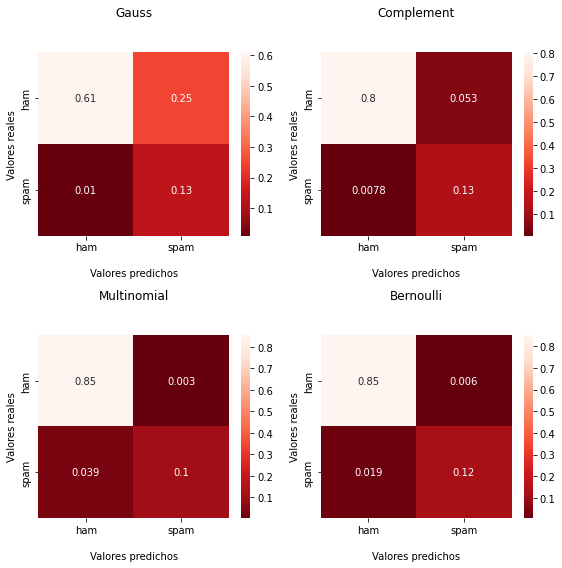

In [6]:
fig, ax = plt.subplots(nrows=2,ncols=2)
fig.set_figheight(8)
fig.set_figwidth(8)

gauss = GaussianNB()
gauss.fit(trainx_real,trainy_real)
cf_matrix = matrix_creator(gauss,testx_real,testy_real)
ax = plt.subplot(2, 2, 0+1)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, cmap='Reds_r')
set_labels(ax,"Gauss")

compl = ComplementNB()
compl.fit(trainx_real,trainy_real)
cf_matrix = matrix_creator(compl,testx_real,testy_real)
ax = plt.subplot(2, 2, 1+1)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, cmap='Reds_r')
set_labels(ax,"Complement")

multi = MultinomialNB()
multi.fit(trainx_real,trainy_real)

cf_matrix = matrix_creator(multi,testx_real,testy_real)
ax = plt.subplot(2, 2, 1+2)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, cmap='Reds_r')
set_labels(ax,"Multinomial")


bern = BernoulliNB()
bern.fit(trainx_real,trainy_real)

cf_matrix = matrix_creator(bern,testx_real,testy_real)
ax = plt.subplot(2, 2, 1+3)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, cmap='Reds_r')
set_labels(ax,"Bernoulli")


plt.tight_layout()
plt.show()



<p align="justify">
Como podemos observar, en términos generales dan resultados muy parecidos y eficientes. Sin embargo, el Gauss no clasifica correctamente los casos que no son spam, probablemente porque las verosimilitudes no se ajusten a una distribución normal. Por otro lado, multibinomial es menos eficiente al clasificar los casos de spam. Esto último se puede deber a que el modelo multibinomial no tiene en cuenta lo desbalanceado que es nuestro dataset, pero los otros modelos sí y por ello son casi idénticos.
</p>

### Tarea 1 con datos binarios

Repetimos la primera tarea con datos binarios.

In [7]:
binario_df = pd.read_csv("spam_preprocesado_binario.csv", sep=",")

y_bin = binario_df.iloc[: , 0]
X_bin = binario_df.iloc[: , 1:]
trainx_binario,testx_binario, trainy_binario, testy_binario = train_test_split(X_bin,y_bin, train_size=0.7,random_state=0)
binario_df.head()

,v1,150p,150ppm,16,18,1st,2nd,500,a100,a1000,...,yes,yesterday,yet,yo,you,your,youre,yours,yourself,yup
0,ham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,spam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
acc_prec_recall_binary = {}

gauss = GaussianNB()
acc_prec_recall_binary["Gauss"] = accuracy_calculator(gauss,trainx_binario,trainy_binario,testx_binario,testy_binario)

multi = MultinomialNB()
acc_prec_recall_binary["Multinomial"] = accuracy_calculator(multi,trainx_binario,trainy_binario,testx_binario,testy_binario)

bern = BernoulliNB()
acc_prec_recall_binary["Bernoulli"] = accuracy_calculator(bern,trainx_binario,trainy_binario,testx_binario,testy_binario)

compl = ComplementNB()
acc_prec_recall_binary["Complement"] = accuracy_calculator(compl,trainx_binario,trainy_binario,testx_binario,testy_binario)

df_binario = pd.DataFrame.from_dict(acc_prec_recall_binary, orient='index',
                       columns=['Accuracy', 'Precision', 'Recall'])
df_binario

,Accuracy,Precision,Recall
Gauss,0.691388,0.889838,0.691388
Multinomial,0.969498,0.969348,0.969498
Bernoulli,0.974880,0.974560,0.974880
Complement,0.944976,0.953710,0.944976


Resultados casi idénticos al anterior caso, para analizarlos mejor, graficamos ambos casos:

### Comparación de modelos bayesianos con las diferentes medidas.

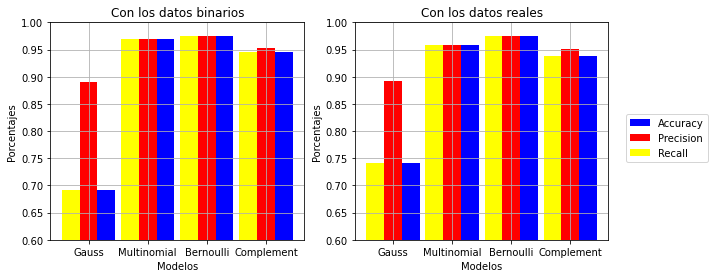

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(4)
fig.set_figwidth(10)

etiquetas=["Gauss","Multinomial","Bernoulli","Complement"]
ax = plt.subplot(1, 2, 1)
x = np.array(range(4))
ax.bar(x, df_binario.loc[:,['Accuracy']].squeeze(), width=0.3, color='blue')
ax.bar(x-0.3, df_binario.loc[:,['Precision']].squeeze(), width=0.3, color='red')
ax.bar(x-0.6, df_binario.loc[:,['Recall']].squeeze(), width=0.3, color='yellow')
ax.set_xlabel('Modelos')
ax.set_ylabel('Porcentajes')
ax.set_xticks(x-0.3)# values
ax.set_xticklabels(etiquetas) # labels
ax.set_title('Con los datos binarios')
ax.set_ylim(0.6,1)
ax.grid()


ax = plt.subplot(1, 2, 2)
ax.bar(x, df_real.loc[:,['Accuracy']].squeeze(), width=0.3, color='blue')
ax.bar(x-0.3, df_real.loc[:,['Precision']].squeeze(), width=0.3, color='red')
ax.bar(x-0.6, df_real.loc[:,['Recall']].squeeze(), width=0.3, color='yellow')
ax.set_xlabel('Modelos')
ax.set_ylabel('Porcentajes')
ax.set_xticks(x-0.3)# values
ax.set_xticklabels(etiquetas) # labels
ax.legend(['Accuracy', 'Precision','Recall'],bbox_to_anchor = (1.05, 0.6))
ax.set_title('Con los datos reales')
ax.set_ylim(0.6,1)
ax.grid()

<p align="justify">
Como podemos observar, independientemente de si son datos reales o binarios, los modelos parecen reconocerlos de forma casi idéntica. En todo caso el complement y multinomial mejoran un poco con datos binarios, esto se puede deber a la distribución con la que trabajan, pues la binomial se adapta mejor a datos binarios.
</p>
<p align="justify">
Por otro lado el modelo gauss empeora con datos reales, pues probablemente se adapten de peor forma a la distribución normal. Ya por último Bernouilli permanece idéntica, esto se puede deber a que la misma función ya entiende los datos de llegada como binarios, sean cuales sean.
</p>
<p align="justify">
En cuanto a las precisiones son muy parecidas pero parece que preccision_accuracy es la más alta en general, esto se debe a que los modelos tienen un alto porcentaje de acierto, en clasificar correos de no spam como correos de no spam. Esto tiene sentido pues la mayoría de correos son de no spam.
</p>
<p align="justify">
La razón de porque el modelo gauss es claramente inferior se puede deber a que las verosimilitudes de los datos están muy alejadas pertenecer a una distribución normal.
</p>
<p align="justify">
De estas gráficas, obtengo que el mejor modelo que se adapta mejor a los datos es el BernouilliNB, y que la medidas interesantes son el accuracy_score y el recall_score, pues tienen en cuenta si los spam se clasifican correctamente que es el propósito de entrenar modelos con estos datos.
</p>

### Matrices de confusion con datos binarios

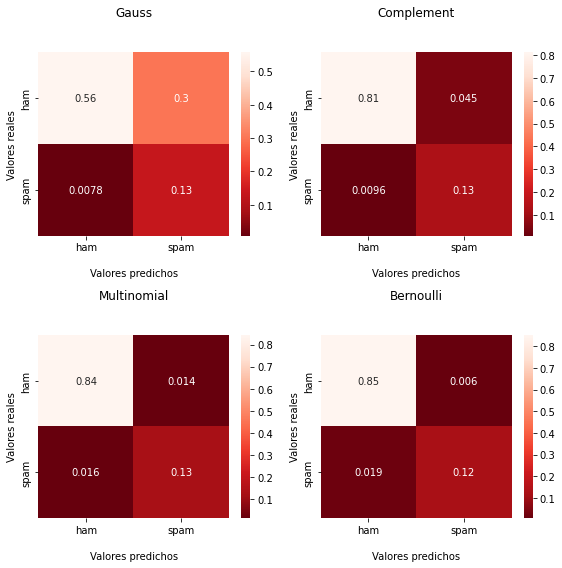

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(8)

gauss = GaussianNB()
gauss.fit(trainx_binario, trainy_binario)
cf_matrix = matrix_creator(gauss, testx_binario, testy_binario)
ax = plt.subplot(2, 2, 0 + 1)
ax = sns.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, cmap='Reds_r')
set_labels(ax,"Gauss")

compl = ComplementNB()
compl.fit(trainx_binario, trainy_binario)
cf_matrix = matrix_creator(compl, testx_binario, testy_binario)
ax = plt.subplot(2, 2, 1 + 1)
ax = sns.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, cmap='Reds_r')
set_labels(ax,"Complement" )

multi = MultinomialNB()
multi.fit(trainx_binario, trainy_binario)
cf_matrix = matrix_creator(multi, testx_binario, testy_binario)
ax = plt.subplot(2, 2, 1 + 2)
ax = sns.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, cmap='Reds_r')
set_labels(ax,"Multinomial" )

bern = BernoulliNB()
bern.fit(trainx_binario, trainy_binario)
cf_matrix = matrix_creator(bern, testx_binario, testy_binario)
ax = plt.subplot(2, 2, 1 + 3)
ax = sns.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, cmap='Reds_r')
set_labels(ax,"Bernoulli")

plt.tight_layout()
plt.show()


<p align="justify">Con los datos binarios, lo más destacable es que Gauss ha disminuido su precisión aún más, probablemente porque, al tratarse de datos binarios, sus verosimilitudes se alejan aún más de pertenecer a una distribución normal. Esta vez multinomial ya no tiene el fallo anterior, y por lo tanto, ahora las meustras se asemejan más a una distribución binomial. Por otro lado, el resto han permanecido prácticamente igual, sin cambios notables, se puede deber a que el resto de funciones se adaptan bien a los datos independientemente de su formato.</p>

# Tarea 2
<p align="justify">
Para poder comprobar el rendimiento del clasificador Naive Bayes en la clasificación de mensajes SMS como legítimos o spam, se debería comparar los resultados con otros clasificadores. Por tanto, en esta tarea se realizará la clasificación de los dos conjuntos anteriores con diferentes clasificadores de los utilizados hasta ahora en las prácticas y de esta manera comprobar la bondad del clasificador Naive Bayes
</p>

In [11]:
acc_prec_recall_binary = {}

svc = SVC()
acc_prec_recall_binary["SVC"] = accuracy_calculator(svc, trainx_binario, trainy_binario, testx_binario, testy_binario)

percep = Perceptron()
acc_prec_recall_binary["Perceptron"] = accuracy_calculator(percep, trainx_binario, trainy_binario, testx_binario, testy_binario)

log = LogisticRegression()
acc_prec_recall_binary["Logistic"] = accuracy_calculator(log, trainx_binario, trainy_binario, testx_binario, testy_binario)

KNeighbors = KNeighborsClassifier()
acc_prec_recall_binary["KNeighborsClassifier"] = accuracy_calculator(KNeighbors, trainx_binario, trainy_binario, testx_binario, testy_binario)

df_binario = pd.DataFrame.from_dict(acc_prec_recall_binary, orient='index',
                       columns=['Accuracy', 'Precision', 'Recall'])
df_binario

,Accuracy,Precision,Recall
SVC,0.974880,0.975595,0.974880
Perceptron,0.972488,0.972063,0.972488
Logistic,0.979665,0.979691,0.979665
KNeighborsClassifier,0.925837,0.931740,0.925837


Para estos nuevos modelos los resultados son mejores, pero para hallar conclusiones consistentes los visualizaremos mediante dos gráficas.

### Con datos reales tarea 2

In [12]:
acc_prec_recall_real = {}

svc = SVC()
acc_prec_recall_real["SVC"] = accuracy_calculator(svc, trainx_real, trainy_real, testx_real, testy_real)

percep = Perceptron()
acc_prec_recall_real["Perceptron"] = accuracy_calculator(percep, trainx_real, trainy_real, testx_real, testy_real)

log = LogisticRegression()
acc_prec_recall_real["Logistic"] = accuracy_calculator(log, trainx_real, trainy_real, testx_real, testy_real)

KNeighbors = KNeighborsClassifier()
acc_prec_recall_real["KNeighborsClassifier"] = accuracy_calculator(KNeighbors, trainx_real, trainy_real, testx_real, testy_real)

df_real = pd.DataFrame.from_dict(acc_prec_recall_real, orient='index',
                       columns=['Accuracy', 'Precision', 'Recall'])
df_real

,Accuracy,Precision,Recall
SVC,0.975478,0.975711,0.975478
Perceptron,0.975478,0.975142,0.975478
Logistic,0.963517,0.963851,0.963517
KNeighborsClassifier,0.924043,0.929424,0.924043


Mismo caso anterior, comparamos los datos profundamente con una gráfica:

### Comparación de modelos con las diferentes medidas (modelos no bayesianos).

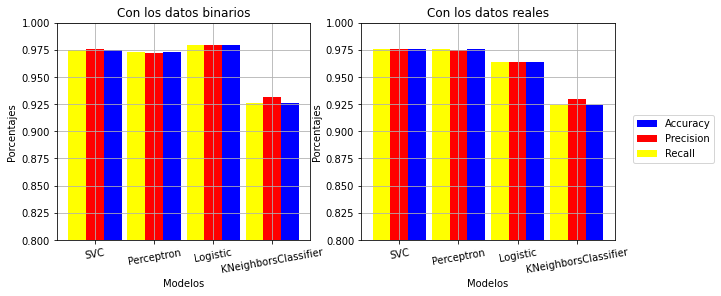

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(4)
fig.set_figwidth(10)

etiquetas=["SVC","Perceptron","Logistic","KNeighborsClassifier"]
ax = plt.subplot(1, 2, 1)
x = np.array(range(4))
ax.bar(x, df_binario.loc[:,['Accuracy']].squeeze(), width=0.3, color='blue')
ax.bar(x-0.3, df_binario.loc[:,['Precision']].squeeze(), width=0.3, color='red')
ax.bar(x-0.6, df_binario.loc[:,['Recall']].squeeze(), width=0.3, color='yellow')
ax.set_xlabel('Modelos')
ax.set_ylabel('Porcentajes')
ax.set_xticks(x-0.3)# values
ax.set_xticklabels(etiquetas) # labels
ax.set_title('Con los datos binarios')
ax.set_ylim(0.8,1)
plt.xticks(rotation = 10)
ax.grid()


ax = plt.subplot(1, 2, 2)
ax.bar(x, df_real.loc[:,['Accuracy']].squeeze(), width=0.3, color='blue')
ax.bar(x-0.3, df_real.loc[:,['Precision']].squeeze(), width=0.3, color='red')
ax.bar(x-0.6, df_real.loc[:,['Recall']].squeeze(), width=0.3, color='yellow')
ax.set_xlabel('Modelos')
ax.set_ylabel('Porcentajes')
ax.set_xticks(x-0.3)# values
ax.set_xticklabels(etiquetas) # labels
ax.legend(['Accuracy', 'Precision','Recall'],bbox_to_anchor = (1.05, 0.6))
ax.set_title('Con los datos reales')
ax.set_ylim(0.8,1)
plt.xticks(rotation = 10)
ax.grid()

<p align="justify">
En estas dos gráficas, mostramos los resultados de toda la Tarea 2, en el caso de estos modelos, los resultados son bastante mejores. Aunque parezcan parecidos a los de la anterior apartado, si nos fijamos la escala de la gráfica, esta es de 0.8 a 1, y ninguna precisión baja del 90% por lo que podemos decir con seguridad que todos estos modelos se ajustan muy bien a nuestros datos dadas estas tres medidas. Por último cabe añadir, que el modelo de K neighbors es el peor, pueden ser muchas razones como que por ejemplo el número de vecinos no sea el ideal, pero en cualquier caso, la diferencia es mínima.
</p>


### Tarea 3: implementación k-fold

En esta sección se añadirá una función al módulo validacion_modelo implementado en la práctica 1. Esta función se denominará validacion_cv e implementará la obtención de las particiones siguiendo la validación cruzada. La función está explicada en más profundidad en el módulo "validación_modelo.py". A continuación, muestro un ejemplo con 5 particiones y 20 muestras.

In [14]:
validacion_cv(np.zeros(shape=20),n_particiones=5, mezclar=False)

[(array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
  array([0, 1, 2, 3])),
 (array([ 0,  1,  2,  3,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
  array([4, 5, 6, 7])),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7, 12, 13, 14, 15, 16, 17, 18, 19]),
  array([ 8,  9, 10, 11])),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 16, 17, 18, 19]),
  array([12, 13, 14, 15])),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
  array([16, 17, 18, 19]))]

Como podemos observar, ha devuelto correctamente una lista de 5 tuplas, las 5 particiones, cuyos elementos son dos ndarrays que representan los correspondientes índices para las muestras train y test de cada partición.

Para probar si funciona de forma correcta, le pongo un caso más complejo con los datos reales con los que hemos trabajado, los índices mezclados, y una semilla. Una vez obtenidos los índices, testeo la función con el modelo LogisticRegressión para confirmar su correcto funcionamiento.

In [19]:
k_fold_test = validacion_cv(X_real,n_particiones=10, mezclar=True, semilla=0)

acum_acc=0
modelo = LogisticRegression()
for (train, test) in k_fold_test:
    modelo.fit(X_real.loc[train], y_real.loc[train])
    acum_acc += accuracy_score(y_real.loc[test], modelo.predict(X_real.loc[test]))

print("El accuracy_score media con el método implementado y el modelo de regresión logística con 10 particiones mezcladas es: \n" + str(acum_acc/10))

El accuracy_score media con el método implementado y el modelo de regresión logística con 10 particiones mezcladas es: 
0.9721839346730758


Dado que la precision es muy similar al de la tarea 2, podemos suponer que ha funcionado correctamente. Podemos deducir que como se parecen mucho, validamos que los resultados anteriores son correctos y no estaban fuertemente condicionados de como estaba dividido train y test inicialmente.